# Linear Subspaces

Welcome to the world of vector subspaces, where simplicity meets abstraction. By exploring these remarkable constructs, we explore the geometry of space in an elegant and efficient way, develop our algebraic intuition, and build fundamental concepts such as linear combinations.

Getting familiar with subspaces will be useful for better understanding more advanced concepts, gaining practice with vector operations, and representing huge sets using just a few elements.


## Generating Lines: A Single Vector's Magic

Consider a line in the plane and take any point $v$ on it.


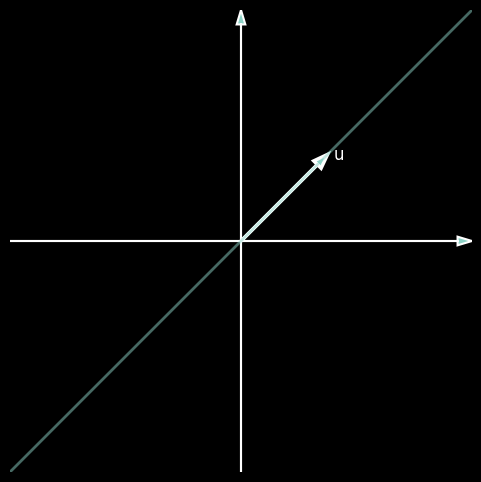

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure
fig, ax = plt.subplots(figsize=(6, 6))

# Limits
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

# Axes with arrows
ax.arrow(-4, 0, 8, 0, length_includes_head=True,
         head_width=0.15, head_length=0.25, linewidth=1.5)
ax.arrow(0, -4, 0, 8, length_includes_head=True,
         head_width=0.15, head_length=0.25, linewidth=1.5)

# Diagonal line
x = np.linspace(-4, 4, 100)
ax.plot(x, x, linewidth=2, alpha=0.5)

# Vector u
u = np.array([1.5, 1.5])
ax.arrow(0, 0, u[0], u[1], length_includes_head=True,
         head_width=0.18, head_length=0.25, linewidth=2.5)

# Label u
ax.text(u[0] + 0.1, u[1] - 0.1, "u", fontsize=12)

# Remove everything else
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
ax.set_aspect("equal")

plt.show()


The point is a vector, and by moving in its direction, you can create an infinite set of other points on the line. By moving in the opposite direction, you obtain the remaining points on the line. All points on the line are scaled versions of $v$.

Starting at the origin, you can draw a vector to the point $v$. By continuing to move in the direction of this vector, you generate an infinite set of points that all lie on the same line. Moving in the opposite direction produces another infinite set of points on this line. In this way, the entire line can be recreated using only points that are scaled versions of $v$.


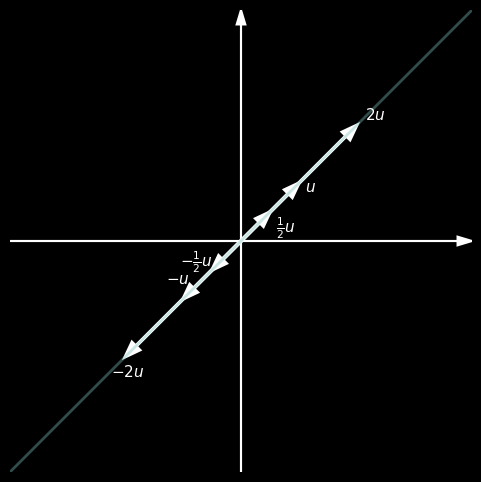

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Figure
fig, ax = plt.subplots(figsize=(6, 6), facecolor="black")
ax.set_facecolor("black")

# Limits
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

# Axes with arrows
ax.arrow(-4, 0, 8, 0, length_includes_head=True,
         head_width=0.15, head_length=0.25, linewidth=1.5, color="white")
ax.arrow(0, -4, 0, 8, length_includes_head=True,
         head_width=0.15, head_length=0.25, linewidth=1.5, color="white")

# Diagonal line
x = np.linspace(-4, 4, 200)
ax.plot(x, x, linewidth=2, alpha=0.4, color="#7fbfbf")

# Base vector direction
u = np.array([1, 1])

# Scalars, labels, and manual offsets (key change)
items = [
    (-2, r"$-2u$", (-0.25, -0.35)),
    (-1, r"$-u$",  (-0.30, 0.25)),
    (-0.5, r"$-\frac{1}{2}u$", (-0.55, 0.05)),
    (0.5, r"$\frac{1}{2}u$", (0.10, -0.35)),
    (1, r"$u$", (0.10, -0.15)),
    (2, r"$2u$", (0.15, 0.10)),
]

# Draw vectors and labels
for s, label, offset in items:
    vec = s * u
    ax.arrow(0, 0, vec[0], vec[1],
             length_includes_head=True,
             head_width=0.18,
             head_length=0.25,
             linewidth=2.5,
             color="white")
    ax.text(vec[0] + offset[0],
            vec[1] + offset[1],
            label,
            fontsize=11,
            color="white")

# Cleanup
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
ax.set_aspect("equal")

plt.show()


Despite the fact that the line lies inside the plane, none of its vectors leave it, as if they do not communicate with the outside. Let us analyze how they interact with each other. If you take two points on the line, they have the form $\lambda v$ and $\mu v$, since they are scaled versions of $v$. Their sum is

$\lambda v + \mu v = (\lambda + \mu)v$,

which means that it also lies on the line. The same holds if you multiply them by any scalar.


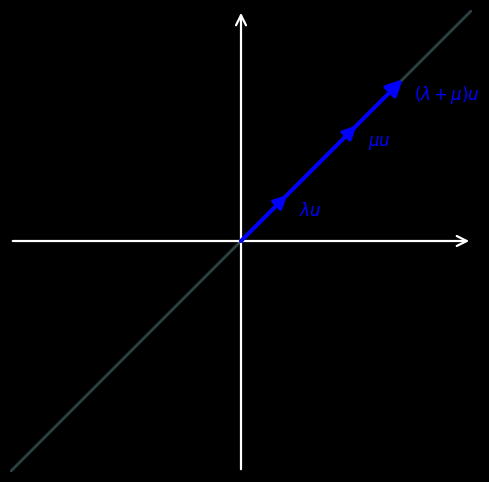

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Figure
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_facecolor("black")
fig.patch.set_facecolor("black")

# Limits
R = 5
ax.set_xlim(-R, R)
ax.set_ylim(-R, R)

# Axes
ax.annotate("", xy=( R, 0), xytext=(-R, 0),
            arrowprops=dict(arrowstyle="->", lw=1.6, color="white", mutation_scale=18))
ax.annotate("", xy=(0,  R), xytext=(0, -R),
            arrowprops=dict(arrowstyle="->", lw=1.6, color="white", mutation_scale=18))

# Direction vector u
u = np.array([1.0, 1.0])

# Scalars
lam = 1.0
mu  = 2.5

# Vectors
lam_u = lam * u
mu_u  = mu  * u
sum_u = (lam + mu) * u

# Diagonal guide
x = np.linspace(-R, R, 200)
ax.plot(x, x, lw=2, alpha=0.35, color="#7fbfbf")

# Helper
def draw_arrow(v, lw=2.6, ms=22):
    ax.annotate("",
                xy=v, xytext=(0, 0),
                arrowprops=dict(
                    arrowstyle="-|>",
                    lw=lw,
                    color="blue",
                    mutation_scale=ms,
                    shrinkA=0,
                    shrinkB=0))

# Draw arrows (all from origin — always visible)
draw_arrow(lam_u, lw=2.4, ms=20)     # λu
draw_arrow(mu_u,  lw=2.4, ms=20)     # μu
draw_arrow(sum_u, lw=2.8, ms=24)     # (λ+μ)u

# Label offset (below diagonal)
offset = np.array([0.25, -0.45])

ax.text(*(lam_u + offset), r"$\lambda u$", fontsize=12, color="blue")
ax.text(*(mu_u + offset), r"$\mu u$", fontsize=12, color="blue")
ax.text(*(sum_u + offset), r"$(\lambda+\mu)u$", fontsize=12, color="blue")

# Cleanup
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
ax.set_aspect("equal")

plt.show()


We have just discovered something: the line is stable under addition and scalar multiplication, as if it were a vector space itself within the plane.

This phenomenon captures the essence of a vector subspace.


## A simple definition

The math is simple and clean: a subset $U$ of a vector space $V$ is a **subspace** if it is itself a vector space, with the same operations as $V$.

This means that the vectors of $U$ remain in $U$ when you add them or multiply them by a scalar.

Do you remember that vector spaces have an additive neutral element, that is, a “$0$”? Since $U$ is a vector space, it must have a $0$. But because $U$ is also a subset of $V$, that $0$ must also belong to $V$. As the $0$ of $V$ is unique, it follows that both spaces share the same $0$. In other words, for $U$ to be a vector space, it must contain $0$.

If a subset $U$ does not contain $0$, it cannot be a vector space.

Does this give you a clue as to why only the lines that cross the origin are subspaces?


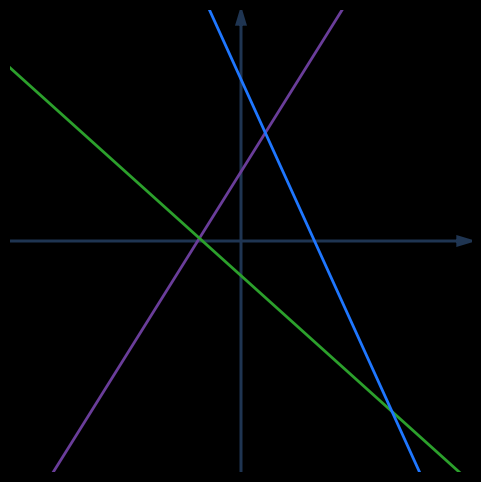

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Figure
fig, ax = plt.subplots(figsize=(6, 6))

# Limits
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

# Axes with arrows
ax.arrow(-4, 0, 8, 0,
         length_includes_head=True,
         head_width=0.15, head_length=0.25,
         linewidth=1.8, color="#1f3552")
ax.arrow(0, -4, 0, 8,
         length_includes_head=True,
         head_width=0.15, head_length=0.25,
         linewidth=1.8, color="#1f3552")

# Lines
x = np.linspace(-4, 4, 200)

# Purple line
ax.plot(x, 1.6 * x + 1.2, color="#6a3d9a", linewidth=2)

# Green line
ax.plot(x, -0.9 * x - 0.6, color="#2ca02c", linewidth=2)

# Blue line
ax.plot(x, -2.2 * x + 2.8, color="#1f77ff", linewidth=2)

# Cleanup
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
ax.set_aspect("equal")

plt.show()


But how can we know if a set $U$ is a vector subspace of $V$ without having to prove all the vector space properties?

This is where our previously discovered facts about lines come into play. Addition and scalar multiplication already satisfy the required algebraic properties, so by restricting them to $U$ they remain valid. However, if we take two vectors in $U$, we are not automatically guaranteed that their sum or a scalar multiple will still lie in $U$. The set may not be stable, as a line through the origin is.

Putting everything together, we obtain the following result.

A subset $U$ of a vector space $V$ is a vector subspace if, for every $v, w \in U$ and every $\lambda \in \mathbb{R}$, the following conditions hold:

- $v + w \in U$
- $\lambda v \in U$
- $0 \in U$

We think of a subspace as a subset that is stable under addition and scalar multiplication, and that contains $0$.


## Building planes

The line is the prototype of a subspace, but is it the only one? Let us move to three-dimensional space to take a look. A single vector also generates a simple line.


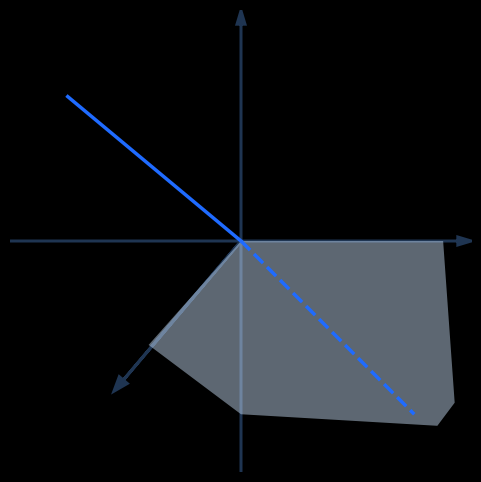

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Figure
fig, ax = plt.subplots(figsize=(6, 6))

# Limits
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

# Axes with arrows
axis_color = "#1f3552"
ax.arrow(-4, 0, 8, 0,
         length_includes_head=True,
         head_width=0.15, head_length=0.25,
         linewidth=1.8, color=axis_color)
ax.arrow(0, -4, 0, 8,
         length_includes_head=True,
         head_width=0.15, head_length=0.25,
         linewidth=1.8, color=axis_color)

# --- Blue direction line ---
# Solid (upper-left)
ax.plot([-3, 0], [2.5, 0],
        color="#1f6bff", linewidth=2.5)

# Dashed continuation (lower-right)
ax.plot([0, 3], [0, -3],
        color="#1f6bff", linewidth=2.5, linestyle="--")

# --- Dark slanted vector (down-left) ---
ax.arrow(0, 0, -2.2, -2.6,
         length_includes_head=True,
         head_width=0.18, head_length=0.25,
         linewidth=2.2, color=axis_color)

# --- Shaded region ---
# Polygon approximating the light-blue area
region_x = [0, 3.5, 3.7, 3.4, 0, -1.6]
region_y = [0, 0, -2.8, -3.2, -3.0, -1.8]

ax.fill(region_x, region_y,
        color="#cfe6ff", alpha=0.45, linewidth=0)

# Cleanup
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
ax.set_aspect("equal")

plt.show()


Now let us focus on two distinct vectors $v$ and $w$. How can we combine them? We can add them, or add scaled versions of them, such as $\lambda v + \mu w$. This is the most natural way to combine them, and for this reason, we call them **linear combinations**.

If $w$ were on the line spanned by $v$, then their linear combinations would still be vectors on that line. But what happens if $w$ is not on the line of $v$? What do their linear combinations look like?

Now we not only control the scalar $\lambda$ of $v$, but also the scalar $\mu$ of $w$. A convenient way to analyze this situation is to set $\lambda = 1$ and vary $\mu$, that is, to consider expressions of the form $v + \mu w$. When considering all possible values of $\mu$, the parallelogram rule shows that we are visualizing the line generated by $w$, but shifted so that it passes through $v$ instead of crossing the origin.


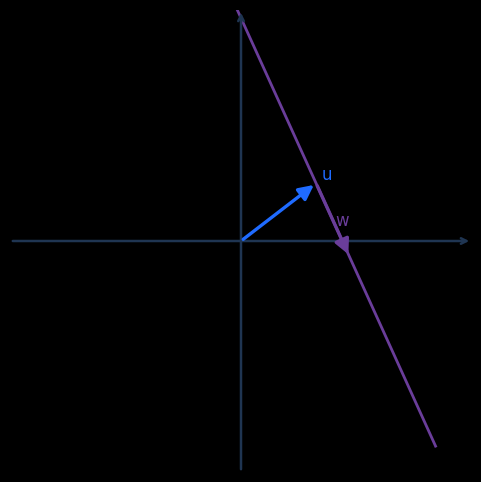

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Figure
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_facecolor("black")
fig.patch.set_facecolor("black")

# Limits
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

axis_color = "#1f3552"

# Axes with arrows
ax.annotate("", xy=(4, 0), xytext=(-4, 0),
            arrowprops=dict(arrowstyle="->", lw=1.8, color=axis_color))
ax.annotate("", xy=(0, 4), xytext=(0, -4),
            arrowprops=dict(arrowstyle="->", lw=1.8, color=axis_color))

# -------------------------
# Blue vector u
# -------------------------
u_tip = np.array([1.3, 1.0])   # tip of u

ax.annotate("", xy=u_tip, xytext=(0, 0),
            arrowprops=dict(arrowstyle="-|>", lw=2.4,
                            color="#1f6bff", mutation_scale=22))
ax.text(u_tip[0] + 0.1, u_tip[1] + 0.05, "u",
        color="#1f6bff", fontsize=12)

# -------------------------
# Purple line THROUGH tip of u
# -------------------------
# Direction of the purple line
d = np.array([1.0, -2.2])
d = d / np.linalg.norm(d)

t = np.linspace(-5, 5, 200)
line_x = u_tip[0] + t * d[0]
line_y = u_tip[1] + t * d[1]

ax.plot(line_x, line_y, color="#6a3d9a", linewidth=2)

# -------------------------
# Purple vector w (aligned with line, no quadrant III vector)
# -------------------------
w_start = u_tip
w_end   = u_tip + 1.4 * d   # same direction as the line

ax.annotate("", xy=w_end, xytext=w_start,
            arrowprops=dict(arrowstyle="-|>", lw=2.4,
                            color="#6a3d9a", mutation_scale=22))

ax.text((w_start[0] + w_end[0]) / 2 + 0.05,
        (w_start[1] + w_end[1]) / 2 - 0.1,
        "w", color="#6a3d9a", fontsize=12)

# Cleanup
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
ax.set_aspect("equal", adjustable="box")

plt.show()


If now $\lambda = 2$, then $2v + \mu w$ is again the line generated by $w$ passing through $2v$. This seems straightforward. Now consider the case where $\lambda$ takes the values $3$, $-1$, $-2$, $-3$, and so on. Each choice of $\lambda$ gives us the line generated by $w$, but shifted slightly.

Thus, all linear combinations of $v$ and $w$ form the union of all these lines. In other words, it looks like we have just generated an entire plane.


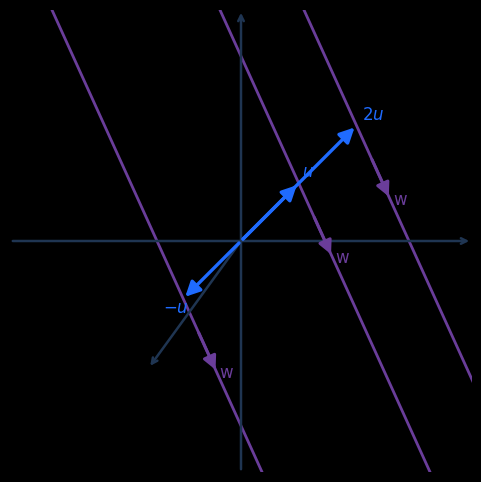

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Figure
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_facecolor("black")
fig.patch.set_facecolor("black")

# Limits
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

axis_color = "#1f3552"
blue = "#1f6bff"
purple = "#6a3d9a"

# Axes with arrows
ax.annotate("", xy=(4, 0), xytext=(-4, 0),
            arrowprops=dict(arrowstyle="->", lw=1.8, color=axis_color))
ax.annotate("", xy=(0, 4), xytext=(0, -4),
            arrowprops=dict(arrowstyle="->", lw=1.8, color=axis_color))

# Dark slanted vector (down-left)
ax.annotate("", xy=(-1.6, -2.2), xytext=(0, 0),
            arrowprops=dict(arrowstyle="->", lw=1.8, color=axis_color))

# Direction u
u = np.array([1.0, 1.0])

# Blue vectors: -u, u, 2u
blue_vectors = [
    (-1, r"$-u$", (-0.35, -0.25)),
    ( 1, r"$u$",  (0.05,  0.10)),
    ( 2, r"$2u$", (0.10,  0.10)),
]

u_tips = []

for s, label, off in blue_vectors:
    v = s * u
    u_tips.append(v)

    ax.annotate("", xy=v, xytext=(0, 0),
                arrowprops=dict(arrowstyle="-|>", lw=2.4,
                                color=blue, mutation_scale=22))
    ax.text(v[0] + off[0], v[1] + off[1], label,
            fontsize=12, color=blue)

# Purple direction (common for all lines)
d = np.array([1.0, -2.2])
d = d / np.linalg.norm(d)

t = np.linspace(-6, 6, 400)  # longer lines

# Purple lines through each blue tip
for tip in u_tips:
    # Line through the tip
    ax.plot(tip[0] + t * d[0],
            tip[1] + t * d[1],
            color=purple, linewidth=2)

    # Arrow w on the line (placed consistently)
    w_start = tip + 0.6 * d
    w_end   = tip + 1.4 * d

    ax.annotate("", xy=w_end, xytext=w_start,
                arrowprops=dict(arrowstyle="-|>", lw=2.2,
                                color=purple, mutation_scale=20))

    ax.text(w_end[0] + 0.05, w_end[1] - 0.1, "w",
            fontsize=12, color=purple)

# Cleanup
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
ax.set_aspect("equal", adjustable="box")

plt.show()


This plane was built from the linear combinations of $v$ and $w$, so, as with lines, we call it the **plane generated by $v$ and $w$**. Everything seems to indicate that if we combine vectors of the plane, we will not leave it, and therefore it is a subspace.

To be sure, we must check that linear combinations are stable under addition and scalar multiplication. Try this as a good exercise.


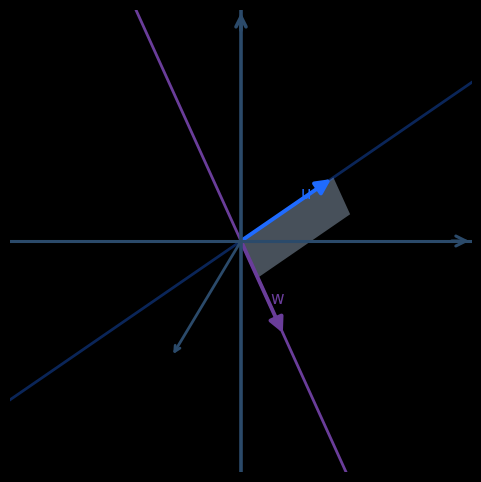

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Figure
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_facecolor("black")
fig.patch.set_facecolor("black")

# Limits
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

# Colors
axis_color = "#2b4a6a"   # slightly brighter so it is visible on black
blue = "#1f6bff"
purple = "#6a3d9a"
shade = "#9fb3c8"

# --------------------
# Data
# --------------------
u = np.array([1.6, 1.1])

w_dir = np.array([1.0, -2.2])
w_dir = w_dir / np.linalg.norm(w_dir)
w = 1.8 * w_dir

# --------------------
# Purple line (through origin)
# --------------------
t = np.linspace(-10, 10, 400)
ax.plot(t * w_dir[0], t * w_dir[1],
        color=purple, linewidth=2, zorder=2)

# --------------------
# Blue direction line (LONG, THROUGH ORIGIN)
# --------------------
u_dir = u / np.linalg.norm(u)
ax.plot(t * u_dir[0], t * u_dir[1],
        color=blue, linewidth=2, alpha=0.35, zorder=2)

# --------------------
# Shaded area BETWEEN u and w
# --------------------
region = np.array([
    [0, 0],
    u,
    u + 0.7 * w_dir,
    0.7 * w_dir
])
ax.fill(region[:, 0], region[:, 1],
        color=shade, alpha=0.45, linewidth=0, zorder=1)

# --------------------
# Extra dark vector (lower-left)
# --------------------
ax.annotate("", xy=(-1.2, -2.0), xytext=(0, 0),
            arrowprops=dict(arrowstyle="->", lw=2.0, color=axis_color),
            zorder=3)

# --------------------
# Blue vector u
# --------------------
ax.annotate("", xy=u, xytext=(0, 0),
            arrowprops=dict(arrowstyle="-|>", lw=2.8,
                            color=blue, mutation_scale=22),
            zorder=4)
ax.text(*(0.6 * u + np.array([0.08, 0.06])), "u",
        fontsize=12, color=blue, zorder=5)

# --------------------
# Purple arrow w (aligned with purple line)
# --------------------
ax.annotate("", xy=w, xytext=(0, 0),
            arrowprops=dict(arrowstyle="-|>", lw=2.8,
                            color=purple, mutation_scale=22),
            zorder=4)
ax.text(*(0.6 * w + np.array([0.06, -0.10])), "w",
        fontsize=12, color=purple, zorder=5)

# --------------------
# AXES: draw as line + arrowhead (so vertical axis cannot disappear)
# --------------------
# Horizontal axis shaft
ax.plot([-4, 4], [0, 0], color=axis_color, lw=2.2, zorder=10)
# Horizontal arrowhead
ax.annotate("", xy=(4, 0), xytext=(3.6, 0),
            arrowprops=dict(arrowstyle="->", lw=2.2, color=axis_color, mutation_scale=18),
            zorder=11)

# Vertical axis shaft (explicitly present)
ax.plot([0, 0], [-4, 4], color=axis_color, lw=2.6, zorder=10)
# Vertical arrowhead
ax.annotate("", xy=(0, 4), xytext=(0, 3.6),
            arrowprops=dict(arrowstyle="->", lw=2.6, color=axis_color, mutation_scale=18),
            zorder=11)

# Cleanup
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
ax.set_aspect("equal", adjustable="box")

plt.show()


## Generalizing

It is okay if you are not familiar with the following terms about functions; you will encounter them in the Calculus track. For now, we will only mention them, and they will not appear in the tasks.

With one vector, we generate a line, while with two vectors (that do not belong to the same line), we obtain a plane. The next step seems quite natural, does it not? In $\mathbb{R}^n$, we can take $k$ mutually different vectors (that are not $0$)
$v_1, v_2, \ldots, v_k$
and consider the set of all their linear combinations:

$\{ \lambda_1 v_1 + \lambda_2 v_2 + \cdots + \lambda_k v_k : \lambda_1, \lambda_2, \ldots, \lambda_k \in \mathbb{R} \}$.

This set is called the space **spanned** by $v_1, v_2, \ldots, v_k$ and is denoted by
$\operatorname{span}(v_1, v_2, \ldots, v_k)$.

When $k = 1$, this is simply a line, and when $k = 2$, it is a plane. Following the same reasoning as in the previous section, you can directly verify that this set is a vector subspace: when you add two linear combinations, you obtain another linear combination (the new coefficients are the sums of the original ones), and the same happens when you multiply any of them by a scalar (the new coefficients are the original ones multiplied by that scalar).

Now, when we have three vectors that are not contained in the same plane, we obtain a three-dimensional space. Even though we may not be able to draw them, the same idea applies for four, five, or more vectors. However, whenever we take a new vector, we must ensure that it is not already contained in the space generated by the others.

In future topics, you will discover that this idea is formalized as **linear independence**, a simple but indispensable concept in linear algebra. Is it not remarkable that with just a few vectors, you can completely describe immensely large sets such as lines and planes?


## Importance

It is okay if you are not familiar with the following terms about functions; you will encounter them in the Calculus track. For now, we will only mention them, and they will not appear in the tasks.

Now that we know what a subspace is, it is natural to ask why we should care about them. From everything we have done so far, we have discovered a key point: subspaces can be fully described using just a few elements. This is very useful, but it is not the only valuable aspect of subspaces.

$\mathbb{R}^n$ is a fundamental space, but in linear algebra we often deal with more complicated spaces. Examples include functions from $\mathbb{R}$ to $\mathbb{R}$. This is a huge set, yet we can identify quite simple subspaces within it: polynomial, integrable, continuous, and differentiable functions are some notable examples. If you know a little calculus, you can easily verify this. Knowing certain subspaces can help us better understand the structure of the entire space.

In linear algebra, systems of linear equations are one of the most important applications—practically the reason for the subject’s existence. Among them are homogeneous systems, and a crucial result is that their solutions form a subspace. Think about this for a moment: if this subspace were a plane, then all solutions could be described using only two vectors. An important observation is that although non-homogeneous systems are much more common and realistic, we can often reduce them to homogeneous systems and then apply the results we already know.

Sometimes a space is so complicated that we cannot easily manipulate its elements, unlike points in the plane. However, there are situations in which we understand one of its subspaces well and can use its elements to approximate those of the entire space as closely as possible. This idea is one of the deepest and most widely used concepts in linear algebra and is called **orthogonal projection**.

Consider an arbitrary function that is very difficult to handle. Polynomial functions, on the other hand, are well understood. A classic technique is to find the polynomial that is closest to the function of interest. Although the original function may be very complicated, the polynomial approximation is often very similar while being much easier to work with and compute.


## Conclusion

If $V$ is a vector space, then a subset $U$ is a vector subspace if it contains $0$ and is closed under addition and scalar multiplication.

Lines are the simplest subspaces and are described by a single vector.

Planes are vector spaces and are described by two vectors.

The space spanned by the vectors $v_1, v_2, \ldots, v_k$ is the set of all their linear combinations and is denoted by $\operatorname{span}(v_1, v_2, \ldots, v_k)$.

Recognizing subspaces has many advantages that facilitate the study of vector spaces.
